In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

In [2]:
import itertools as it
from collections import Counter, defaultdict, deque

In [86]:
from agents import *
from envs import *
from meta import *
from policies import *
from value_functions import *

agent = Agent()
env = MouselabEnv(2, 2, reward=Discrete((0, 1)), cost=0.01)
agent.register(env)

# policy = AdvantageActorCritic(actor_lr=.001, critic_lr=.005, actor_lambda=0.5, critic_lambda=1)
Q = BayesianRegressionQ()
agent.register(Q)
agent.register(MaxQSamplePolicy(Q))
agent.register(Memory())
trace = pd.DataFrame(agent.run_many(500))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


IndexError: list index out of range

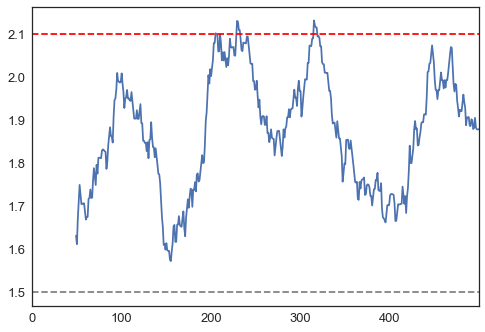

In [68]:
df = pd.DataFrame(trace)
df['return'].rolling(50).mean().plot()
plt.axhline(2.1, c='r', ls='--')
plt.axhline(1.5, c='gray', ls='--')

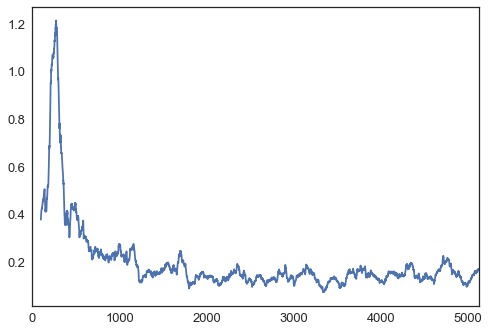

In [70]:
pd.DataFrame(agent.policy.saved)['regret'].rolling(100).mean().plot()

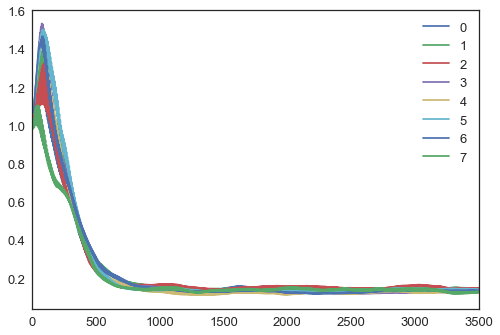

In [79]:
pd.DataFrame(np.concatenate(Q.saved['sigma_w'])).rolling(10).mean().plot()

In [85]:
Q.saved['w'][-1]

array([[ 1.914,  1.744,  1.564,  1.905,  1.845,  1.922,  1.826,  1.611],
       [-0.256,  0.135,  0.196, -0.051,  0.154,  0.041, -0.04 , -0.129],
       [ 0.227,  0.022, -0.228,  0.108, -0.007, -0.17 ,  0.308,  0.062],
       [ 0.04 ,  0.066, -0.015,  0.073,  0.193, -0.004,  0.164,  0.135],
       [-0.135,  0.009,  0.083, -0.063, -0.02 ,  0.037,  0.017,  0.133],
       [ 0.173, -0.051,  0.07 , -0.044,  0.072, -0.031, -0.003,  0.084],
       [-0.161,  0.112, -0.01 , -0.017, -0.065, -0.204, -0.096,  0.175]], dtype=float32)

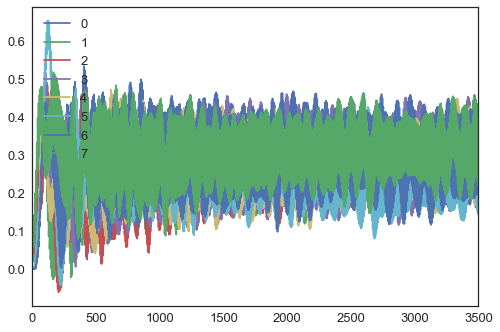

In [81]:
pd.DataFrame(np.concatenate(Q.saved['w'])).rolling(10).mean().plot()

In [151]:
env = MouselabEnv(2, 2, reward=d, cost=0)
agent = Agent()
agent.register(env)
agent.register(fixed)
df = pd.DataFrame(agent.run_many(1000))

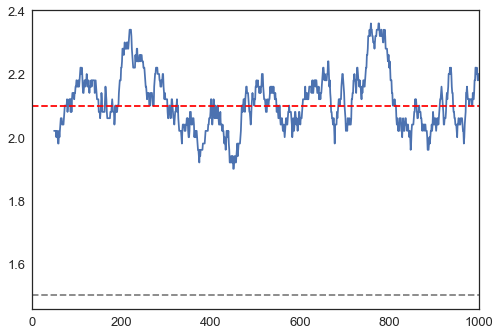

In [152]:
df['return'].rolling(50).mean().plot()
plt.axhline(2.1, c='r', ls='--')
plt.axhline(1.5, c='gray', ls='--')

# Hyperparameters

In [126]:
%%time

from agents import *
from envs import *
from meta import *
from policies import *

agent = Agent()
agent.register(env)

def loss(x):
    policy = AdvantageActorCritic(actor_lr=x[0], 
                                  critic_lr=x[1], 
                                  actor_lambda=x[2], 
                                  critic_lambda=x[3])
    agent.register(policy)
    trace = agent.run_many(2000, max_steps=500, pbar=False)
    avg = sum(trace['return'][-500:]) / 500
    print('{:<50}  {}'.format(str(np.round(x, 7)), avg))
    return -avg

from skopt import gp_minimize
space = [
    (1e-4, 1e-2, 'log-uniform'),
    (1e-4, 1e-2, 'log-uniform'),
    (0.5, 1.),
    (0.5, 1.),
]

gp = gp_minimize(loss, space, n_calls=100, random_state=0)

[ 0.001  0.003  0.801  0.772]                       1.5947999999999922
[  7.036e-04   1.958e-03   7.188e-01   9.459e-01]   1.564799999999996
[  8.459e-03   5.846e-04   8.959e-01   7.644e-01]   1.52899999999999
[ 0.001  0.007  0.536  0.544]                       1.6453999999999942
[  1.098e-04   4.626e-03   8.891e-01   9.350e-01]   1.4387999999999994
[ 0.009  0.004  0.731  0.89 ]                       1.6135999999999904
[  1.724e-04   1.905e-03   5.717e-01   9.723e-01]   1.6103999999999972
[  1.106e-03   6.750e-04   6.323e-01   8.871e-01]   1.5387999999999928
[ 0.001  0.001  0.509  0.809]                       1.5977999999999972
[ 0.002  0.002  0.972  0.841]                       1.6383999999999943
[ 0.005  0.01   0.751  0.584]                       1.6917999999999884
[ 0.005  0.01   1.     0.683]                       1.6729999999999916
[ 0.005  0.01   0.5    0.5  ]                       1.664799999999989
[  1.000e-04   1.000e-04   5.681e-01   5.528e-01]   1.554599999999997
[ 0.002  0.

/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6869999999999872
[ 0.01   0.002  0.581  1.   ]                       1.5971999999999997
[ 0.002  0.003  0.537  0.5  ]                       1.585799999999992


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6579999999999855
[  9.374e-03   2.362e-04   5.599e-01   9.913e-01]   1.466
[ 0.01   0.006  0.645  1.   ]                       1.631199999999989


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.7169999999999859


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.5517999999999998


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6433999999999853


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.722199999999985


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6331999999999858
[ 0.01  0.01  1.    0.5 ]                           1.5887999999999918
[ 0.005  0.01   0.5    1.   ]                       1.6043999999999892
[  1.026e-04   1.021e-04   9.021e-01   5.392e-01]   1.5213999999999959
[ 0.01   0.007  0.5    0.5  ]                       1.6635999999999862
[ 0.01   0.007  0.987  0.5  ]                       1.627199999999987
[  1.050e-04   1.490e-03   8.705e-01   5.256e-01]   1.3535999999999981
[  1.000e-04   1.000e-04   5.000e-01   1.000e+00]   1.5753999999999961
[ 0.01  0.01  0.5   0.69]                           1.6399999999999864
[  2.853e-04   1.000e-04   5.000e-01   1.000e+00]   1.5529999999999957
[ 0.005  0.01   0.5    0.657]                       1.6053999999999877
[ 0.001  0.009  0.696  0.994]                       1.577599999999993
[ 0.003  0.003  0.935  0.998]                       1.5141999999999949
[ 0.005  0.01   0.5    0.5  ]                       1.4725999999999928
[ 0.01  

/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    0.5 ]                           1.6135999999999875
[  1.493e-03   1.009e-04   8.115e-01   9.942e-01]   1.4676


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.5939999999999872


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.713799999999985
[  4.428e-04   9.944e-03   9.174e-01   5.418e-01]   1.4901999999999969


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.617399999999987


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6769999999999856


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6603999999999852


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6179999999999877


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  1.    1.  ]                           1.444399999999987
[ 0.01   0.01   0.5    0.794]                       1.6869999999999852
[  1.000e-04   1.000e-04   1.000e+00   1.000e+00]   1.5079999999999945
[ 0.002  0.01   0.5    1.   ]                       1.5847999999999907
[ 0.01   0.01   0.5    0.795]                       1.6317999999999875
[ 0.01   0.01   0.5    0.803]                       1.619799999999986
[ 0.01   0.01   0.5    0.815]                       1.6499999999999857
[ 0.01   0.01   0.5    0.818]                       1.511999999999989
[ 0.005  0.01   0.5    0.5  ]                       1.6145999999999883


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6435999999999855


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6123999999999867


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.642199999999986


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6119999999999859
[ 0.004  0.01   1.     0.5  ]                       1.543999999999993


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.707999999999985


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.7083999999999844


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.5087999999999984


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6773999999999865


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6265999999999872


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.643799999999988


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6971999999999852


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6721999999999853


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6639999999999857


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.4639999999999997


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.6823999999999861


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.7031999999999856


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.5699999999999883


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.612399999999989


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.602599999999987


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6421999999999861
[ 0.005  0.01   0.5    0.5  ]                       1.5821999999999916


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   1.  ]                           1.5997999999999877


/usr/local/lib/miniconda3/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[ 0.01  0.01  0.5   0.5 ]                           1.6937999999999858
CPU times: user 2h 48min 37s, sys: 33min 55s, total: 3h 22min 32s
Wall time: 3h 15min 34s


[0.01, 0.01, 0.5, 0.5]

In [121]:
from sklearn.externals.joblib import Parallel, delayed
from skopt.learning import GaussianProcessRegressor
from skopt.space import Real
from skopt import Optimizer

optimizer = Optimizer(
    base_estimator=GaussianProcessRegressor(),
    dimensions=[Real(-5.0, 10.0), Real(0.0, 15.0)]
)

In [116]:
for i in range(10): 
    points = [optimizer.ask() for _ in range(8)
    y = Parallel()(delayed(loss)(x) for x in points)  # evaluate points in parallel
    optimizer.tell(x, y)

NameError: name 'gp' is not defined

In [52]:
def encode(state):
    return np.array([1. if not hasattr(x, 'sample') else 0.
                     for x in state])

env.reset()
env.step(3)
state = env._state
encode(state)

(Cat, Cat, Cat, 0, Cat, Cat, Cat)


array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.])